In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import math
from operator import itemgetter

In [2]:
def user_input_bar():
    points = []
    print("Введите две точки для задания отрезка:")
    x, y = map(int, input().split())
    points.append([x,y])
    flag = True
    while (flag):
        x, y = map(int, input().split())
        points.append([x,y])
        if (len(points) == 2):
            flag = False       
    return points

In [3]:
def user_input_rectangle():
    points = []
    print("Введите x,y точки для задания прямоугольного окна, и его длину, ширину:")
    x, y = map(int, input().split())
    points.append([x,y])
    flag = True
    while (flag):
        x, y = map(int, input().split())
        points.append([x,y])
        if (len(points) == 2):
            flag = False       
    return points

In [4]:
def user_input_window():
    points = []
    print("Введите точки для задания произвольного окна:")
    x, y = map(int, input().split())
    points.append([x,y])
    flag = True
    while (flag):
        x, y = map(int, input().split())
        points.append([x,y])
        if (points[0][0] == x and points[0][1] == y):
            flag = False       
    return points

In [5]:
def get_code(bar, rect):
    
    #задаим коды концов в двоичном представлении 
    RIGHT = 2   # 0010
    LEFT = 1    # 0001
    INSIDE = 0  # 0000
    TOP = 8     # 1000
    BOTTOM = 4  # 0100
    
    x_min = rect.get_x()
    y_min = rect.get_y()
    x_max = rect.get_width() + x_min
    y_max = rect.get_height() + y_min

    code=INSIDE

    if bar[0] < x_min:
        code |= LEFT
    elif bar[0] > x_max:
        code |= RIGHT

    if bar[1] < y_min:
        code |= BOTTOM
    elif bar[1] > y_max:
        code |= TOP
        
    return code    

       Алгоритм Коэна-Сазерленда 
(двумерное отсечение отрезка сторонами окна)

In [6]:
def Cohen_Sutherland(bar, rect):
    
    RIGHT = 2   # 0010
    LEFT = 1    # 0001
    INSIDE = 0  # 0000
    TOP = 8     # 1000
    BOTTOM = 4  # 0100

    x_min = rect.get_x()
    y_min = rect.get_y()
    x_max = rect.get_width() + x_min
    y_max = rect.get_height() + y_min
    
    ax = plt.gca()

    position_0 = get_code(bar[0], rect)
    position_1 = get_code(bar[1],rect)
    accept = False
    while True:
        if not(position_0|position_1):
            accept= True
            break
        elif position_0 & position_1:
            break
        else:
            x, y = [0,0]
            position_out = position_1 if position_1 > position_0 else position_0
            if position_out & TOP:
                x = bar[0][0] + (bar[1][0] - bar[0][0]) * (y_max - bar[0][1]) / (bar[1][1] - bar[0][1])
                y = y_max
            elif position_out & BOTTOM:
                x = bar[0][0] + (bar[1][0] - bar[0][0]) * (y_min - bar[0][1]) / (bar[1][1] - bar[0][1])
                y = y_min
            elif position_out & RIGHT :
                y = bar[0][1] + (bar[1][1] - bar[0][1]) * (x_max - bar[0][0]) / (bar[1][0] - bar[0][0])
                x = x_max
            elif position_out & LEFT:
                y = bar[0][1] + (bar[1][1] - bar[0][1]) * (x_min - bar[0][0]) / (bar[1][0] - bar[0][0])
                x = x_min

            if position_out == position_0:
                bar[0][0] = x
                bar[0][1] = y
                position_0 = get_code(bar[0], rect)
            else:
                bar[1][0] = x
                bar[1][1] = y
                position_1 = get_code(bar[1], rect)
    if accept:
        w = x_max - x_min
        h = y_max - y_min
        rect = patches.Rectangle((x_min,y_min),w,h, edgecolor='r')
        ax.add_patch(rect)
        ax.plot([bar[0][0],bar[1][0]], [bar[0][1],bar[1][1]], color='salmon')
        plt.axis('scaled')
        plt.show()

Введите x,y точки для задания прямоугольного окна, и его длину, ширину:
5 6
10 8
Введите две точки для задания отрезка:
25 12
7 5


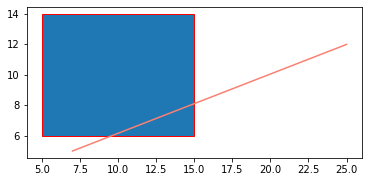

In [10]:
ax = plt.gca()

points_for_rect = user_input_rectangle()

bar_for_1alg = user_input_bar()
ax.plot([bar_for_1alg[0][0],bar_for_1alg[1][0]], [bar_for_1alg[0][1],bar_for_1alg[1][1]], color='salmon')

rect = patches.Rectangle((points_for_rect[0][0],points_for_rect[0][1]),points_for_rect[1][0],points_for_rect[1][1], edgecolor='r')

ax.add_patch(rect)

plt.axis('scaled')
plt.show()

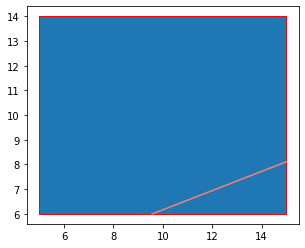

In [11]:
Cohen_Sutherland(bar_for_1alg, rect)

    Алгоритм Кируса-Бека



In [12]:
def dot( p0_x, p0_y, p1_x, p1_y):
    return p0_x * p1_x+ p0_y * p1_y

In [13]:
def Cyrus_Beck(points,bar):
    normal=[]
    n=len(points)
    for i in range(0,n):
        normal.append((points[i][1] - points[(i + 1) % n][1],points[(i + 1) % n][0] - points[i][0]))
    p1_p0=(bar[1][0] - bar[0][0], bar[1][1] - bar[0][1])
    p0_pei=[]
    for point in points:
        p0_pei.append((point[0] - bar[0][0],point[1] - bar[0][1]))
    numerator=[]
    denominator=[]
    for i in range(0,n):
        normal_i=normal[i]
        p0_pei_i=p0_pei[i]
        numerator.append(dot(normal_i[0],normal_i[1], p0_pei_i[0],p0_pei_i[1]))
        denominator.append(dot(normal_i[0],normal_i[1], p1_p0[0],p1_p0[1]))
    t=[]
    t_e=[]
    t_l=[]
    for i in range(0,n):
        if denominator[i]==0:
            curr_t=-math.inf
        else:
            curr_t=numerator[i]/denominator[i]
        t.append(curr_t)
        if denominator[i]>0:
            t_e.append(curr_t)
        else:
            t_l.append(curr_t)
    t_e.append(1)
    t_l.append(0)
    t_e.reverse()
    t_l.reverse()
    temp=(min(t_e),max(t_l))
    if temp[0] < temp[1]:
        return [(-1, -1),(-1, -1)]
    start=(bar[0][0] + p1_p0[0] * temp[0],bar[0][1] + p1_p0[1] * temp[0])
    end=(bar[0][0]+ p1_p0[0] * temp[1],bar[0][1] + p1_p0[1] * temp[1])
    return [start,end]

Введите точки для задания произвольного окна:
5 5
5 17
10 12
15 17
15 5
5 5
Введите две точки для задания отрезка:
0 7
20 7


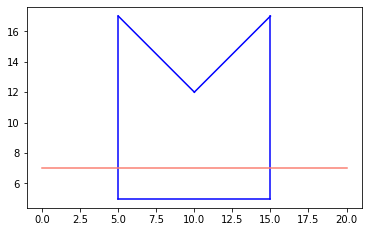

In [14]:
ax = plt.gca()

points = user_input_window()
for i in range(0,len(points)-1):
        plt.plot((points[i][0],points[i+1][0]),(points[i][1],points[i+1][1]), c = 'b')

bar = user_input_bar()
ax.plot([bar[0][0],bar[1][0]], [bar[0][1],bar[1][1]], color='salmon')
plt.axis('scaled')
plt.show()

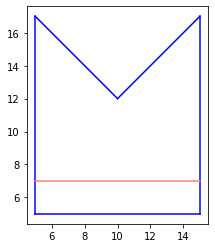

In [15]:
new_bar = Cyrus_Beck(points,bar)

ax = plt.gca()

for i in range(0,len(points)-1):
        plt.plot((points[i][0],points[i+1][0]),(points[i][1],points[i+1][1]), c = 'b')

ax.plot([new_bar[0][0],new_bar[1][0]], [new_bar[0][1],new_bar[1][1]], color='salmon')
plt.axis('scaled')
plt.show()